In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.image as mpimg
from PIL import Image

In [2]:
# Load the data
df = pd.read_csv('/kaggle/input/dubois-data-portrait-challenge/challenge-only/challenge02/data.csv')
df

,Population,Age,Single,Married,Divorced and Widowed
0,Germany,15-40,62.1,37.3,0.6
1,Negroes,15-40,41.0,54.0,5.0
2,Germany,40-60,9.6,84.8,5.6
3,Negroes,40-60,4.5,73.5,22.0
4,Germany,60 and over,8.2,62.2,29.2
5,Negroes,60 and over,4.5,54.5,41.0


In [3]:
# Rename column
df = df.rename(columns = {'Divorced and Widowed':'Widowed and Divorced'})

In [4]:
# Get info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Population            6 non-null      object 
 1   Age                   6 non-null      object 
 2   Single                6 non-null      float64
 3   Married               6 non-null      float64
 4   Widowed and Divorced  6 non-null      float64
dtypes: float64(3), object(2)
memory usage: 368.0+ bytes


In [5]:
# Set index
df = df.set_index(['Population', 'Age'])

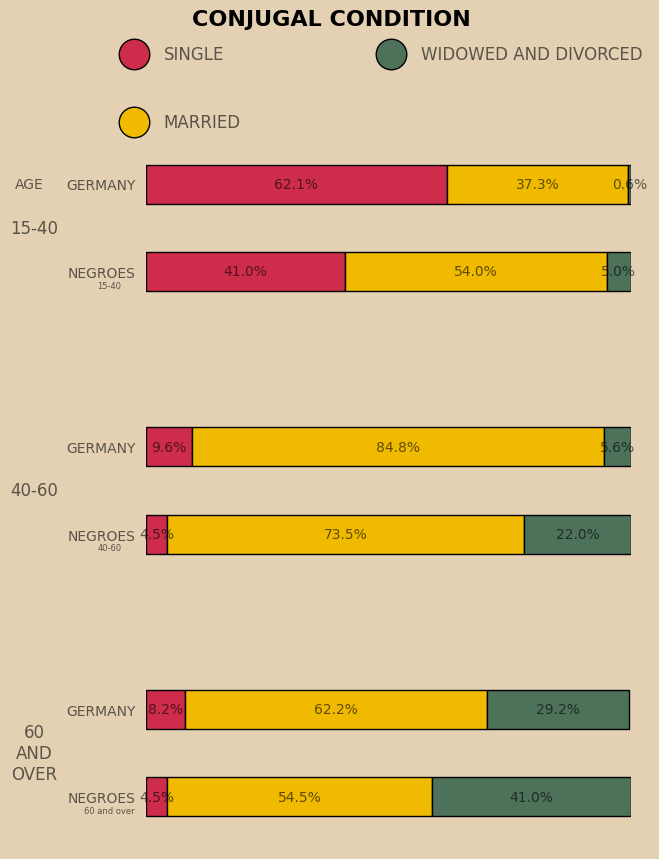

In [6]:
# Create a figure and set background color
fig, ax = plt.subplots(figsize=(8.09, 10.24), facecolor='#e4d1b4')

# Adjust Axes to occupy 60% width and align to the right
ax.set_position([0.27, 0.16, 0.60, 0.7])

# Hide x axis
ax.xaxis.set_visible(False)

# Prepare the data for stacked bars
data = df.values

# Set the full length of the stacked bars
ax.set_xlim(0, np.sum(data, axis=1).max())

# Remove frame
ax.set_frame_on(False)

# Remove ticks
ax.tick_params(axis='both', which='both', width=0)


## Bars
# Set colors for values
bar_colors = ['#ce2c4b', '#f0ba00', '#4e715a']

# Get the column names
colnames = df.columns

# Set the starting positions for each stack
data_cum = data.cumsum(axis=1)

# Custom y-positions for Population bar labels
bar_y_positions = [8, 7.35, 6.05, 5.4, 4.1, 3.45]

# Plot the bars
for i, (colname, color) in enumerate(zip(colnames, bar_colors)):
    widths = data[:, i]
    starts = data_cum[:, i] - widths
    rects = ax.barh(bar_y_positions, widths, height=0.29, left=starts, label=colname, 
                    color=color, edgecolor='black')
    
    # Add labels to the center of each bar
    ax.bar_label(rects, labels=[f'{str(w)}%' for w in widths], label_type='center', alpha=0.6)      

# Set y-ticks
ax.set_yticks(bar_y_positions)

# Set y-tick labels
ax.set_yticklabels([p.upper() for p in df.index.get_level_values(0).values])

# Apply alpha to y-tick labels
for tick in ax.get_yticklabels():
    tick.set_alpha(0.6)  
    

## Annotations
# Calculate the group means based on the 'Age' index
age_cat = df.index.get_level_values('Age').unique()

# Custom age group labels in upper case
age_labels = {
    '15-40': '15-40',
    '40-60': '40-60',
    '60 and over': '60\nAND\nOVER'}

# Calculate the mean y-position for each age group 
for group in age_cat:
    age_y_positions = np.array(bar_y_positions)[df.index.get_level_values('Age') == group]
    age_mean_y = np.mean(age_y_positions)    
    
    # Add Age labels to the left
    ax.text(-23, age_mean_y, age_labels[group], va='center', ha='center', alpha=0.6, fontsize=12)
    
        
# Add AGE as annotation 
ax.text(-21, bar_y_positions[0], 'AGE', va='center', ha='right', alpha=0.6)


# Age labels to annotate in upper case
y_age_labels = [p.upper() for p in df.index.get_level_values(1).values]

# Unique age labels
annotations = df.index.get_level_values('Age').unique()

# Iterate over y-tick labels and positions
annotation_index = 0 
for i, (y_pos, label) in enumerate(zip(bar_y_positions, y_age_labels)):
    # Check if the index is odd to place annotation under every odd y-tick label
    if i % 2 == 1 and annotation_index < len(annotations):
        ax.annotate(
            annotations[annotation_index],  
            xy=(0, y_pos),  
            xytext=(-26, -10),  
            textcoords='offset points',  
            fontsize=6, ha='center', va='center', alpha=0.6
        )
        # Move to the next annotation
        annotation_index += 1
        

## Legend
# Create custom circle markers for the legend
handles = [Line2D([0], [0], marker='o', linestyle='None', color='black', label=colname.upper(),
                  markerfacecolor=color, markersize=22) 
           for colname, color in zip(colnames, bar_colors)]

# Add legend with 2 columns and prevent to overlap
legend = ax.legend(handles=handles, ncols=2, bbox_to_anchor=(-0.09, 0.98), loc='lower left', columnspacing = 8,
          labelspacing = 3, fontsize='large', facecolor='#e4d1b4', frameon = False)

# Modify alpha for legend labels 
for text in legend.get_texts():
    text.set_alpha(0.6)  

## Title
# Add title
fig.suptitle('CONJUGAL CONDITION', fontweight='bold', fontsize=16, ha='center')

# Saving the figure.
plt.savefig("plate10.jpg")

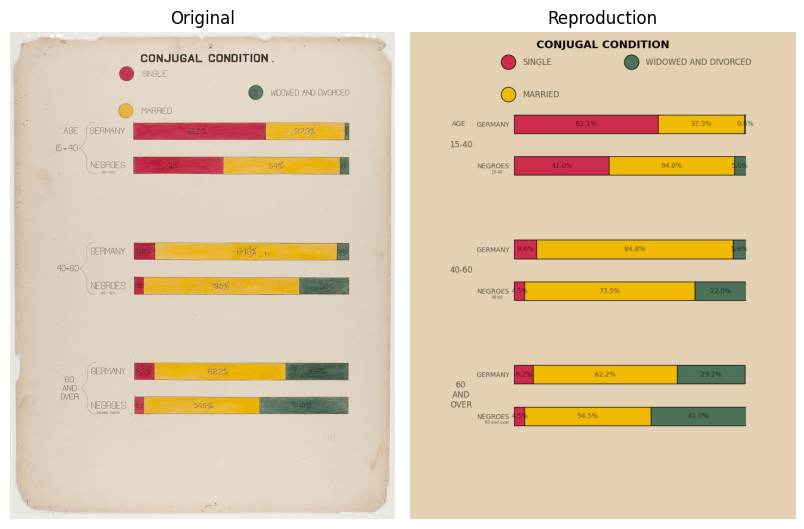

In [7]:
# Load the images
image1 = Image.open("/kaggle/input/dubois-data-portrait-challenge/challenge-only/challenge02/original-plate-10.jpg")
image2 = Image.open("plate10.jpg")

# Convert the images to a numpy array 
image_np1 = np.array(image1)
image_np2 = np.array(image2)

# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8.15, 10.24))

# Left subplot
ax1.imshow(image_np1)
# Turn off axis for the image
ax1.axis('off')  
# Set title
ax1.set_title('Original')

# Right subplot
ax2.imshow(image_np2)
# Turn off axis for the image
ax2.axis('off')  
# Set title
ax2.set_title('Reproduction')

# Adjust the layout to avoid overlap
plt.tight_layout()

# Save the combined figure as a PNG file
#plt.savefig("image_and_plot_side_by_side.png", dpi=300)

# Show the figure
plt.show()